In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download('punkt')

In [2]:
dataset = pd.read_pickle('other_xmltodict_all_major_fields.pkl')

In [3]:
### Drop the rows with no values in section_bodies
dataset = dataset[dataset['section_bodies'] != 'Null']
print("Without Null rows: " + str(len(dataset)))

Without Null rows: 2520


In [4]:
#only keep the SOR and CRC...SI are not included in the scope
dataset['regulation_type'].value_counts()

SOR     2265
SI       246
Null       9
Name: regulation_type, dtype: int64

In [5]:
dataset = dataset[dataset['regulation_type']!= 'SI']

In [6]:
dataset['regulation_type'].value_counts()

SOR     2265
Null       9
Name: regulation_type, dtype: int64

In [7]:
#Check the null regulation types...are they okay?
dataset[dataset['regulation_type']=='Null']

,consolidation_date,enabling_authority,enabling_type,file_name,instrument_number,language,last_modified_date,order_number,registration_date,regulation_maker,regulation_provision,regulation_type,repealed,section_bodies,section_labels,title
124,2018-06-11,"[{'@reference-type': 'act', '#text': 'APPROPRI...","[{'@reference-type': 'act', '#text': 'APPROPRI...","Consolidation_Regs_1.2.0/EN/C.R.C.,_c._340.xml","C.R.C., c. 340",en,2006-10-26,Null,Null,Null,Null,Null,False,"['In these Regulations, ""Minister"" means the M...","['2', '3', '4', '5']",REGULATIONS RESPECTING THE REIMBURSEMENT OF PR...
213,2018-06-11,WAR SERVICE GRANTS ACT,act,"Consolidation_Regs_1.2.0/EN/C.R.C.,_c._1600.xml","C.R.C., c. 1600",en,Null,Null,Null,Null,Null,Null,False,['Where an infant qualifies to receive the gra...,"['2', '3', '4', '5']",ORDER AUTHORIZING PERSONS TO RECEIVE A WAR SER...
650,2018-06-11,NUCLEAR SAFETY AND CONTROL ACT,act,Consolidation_Regs_1.2.0/EN/SOR-2000-205.xml,SOR/2000-205,en,Null,2000-785,2000-5-31,P.C.,"[{'@language-align': 'yes', '@format-ref': 'in...",Null,False,['These Regulations apply in respect of Class\...,"['2', '3', '4', '5', '6', '7', '8', '9', '10',...",CLASS II NUCLEAR FACILITIES AND PRESCRIBED EQU...
1133,2018-06-11,PILOTAGE ACT,act,"Consolidation_Regs_1.2.0/EN/C.R.C.,_c._1266.xml","C.R.C., c. 1266",en,Null,Null,Null,Null,Null,Null,False,"['In these Regulations,', 'The following areas...","['2', '3', '4', '4.1', '4.2', '4.3', '4.4', '4...","Regulations Respecting the Establishment, Oper..."
1977,2018-06-11,PRECIOUS METALS MARKING ACT,act,"Consolidation_Regs_1.2.0/EN/C.R.C.,_c._1302.xml","C.R.C., c. 1302",en,2005-7-22,Null,Null,Null,Null,Null,False,['The Minister of Consumer and Corporate Affai...,['2'],Order Designating the Minister for the Purpose...
3560,2018-06-11,COOPERATIVE CREDIT ASSOCIATIONS ACT,act,Consolidation_Regs_1.2.0/EN/SOR-2006-315.xml,SOR/2006-315,en,2007-1-25,2006-1440,2006-11-28,P.C.,Her Excellency the Governor General in Council...,Null,False,['For the purpose of subsection 145(1) of the ...,"['2', '3', '4', '5', '6', '7', '8', '9', '10']",Meetings and Proposals (Cooperative Credit Ass...
3660,2018-06-11,VETERANS’ LAND ACT,act,"Consolidation_Regs_1.2.0/EN/C.R.C.,_c._1593.xml","C.R.C., c. 1593",en,Null,Null,Null,Null,Null,Null,False,"['In these Regulations,', 'A regional advisory...","['2', '3', '4', '5', '6', '7']",Regulations Respecting Regional Advisory Commi...
3833,2018-06-11,INSURANCE COMPANIES ACT,act,Consolidation_Regs_1.2.0/EN/SOR-2006-316.xml,SOR/2006-316,en,2007-1-25,2006-1441,2006-11-28,P.C.,Her Excellency the Governor General in Council...,Null,False,"['For the purposes of paragraphs 142(1)(a), (b...","['2', '3', '4', '5', '6', '7', '8', '9', '10',...",Meeting and Proposals (Insurance Companies and...
4063,2018-06-11,EXPORT AND IMPORT PERMITS ACT,act,Consolidation_Regs_1.2.0/EN/SOR-89-202.xml,SOR/89-202,en,2006-9-21,1989-614,1989-4-13,P.C.,Her Excellency the Governor General in Council...,Null,False,"['The following goods and technology, when int...",['2'],Export Control List


## 1. Creating the Corpus & Sparse Matrix

In [8]:
def make_corpus(dataset, column):
    '''This function reads in a pandas dataframe (dataset) and the column name (e.g. 'text_column'). 
    Then it strips all punctuation, makes it lower case, tokenizes it, and removes english stopwords. 
    Finally it returns two lists (either directly or via tuple unpacking. the first is the documents
    without stopwords; the second is the documents stemmed via porterstemmer.
    '''
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    stop_words = set(stopwords.words('english'))
    import string 
    import sys
    translator = str.maketrans('', '', string.punctuation)
    import re
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    filtered_text_list = []
    stemmed_text_list = []
    for i in range (0, len(dataset)):
        text = dataset.iloc[i][column].lower().translate(translator)
        text = re.sub('\n', ' ', text)
        word_tokens = word_tokenize(text) 
        filtered_text = [w for w in word_tokens if not w in stop_words]
        filtered_text = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_text.append(w)
        stemmed_text = []
        for w in filtered_text:
            stemmed_text.append(ps.stem(w))
        filtered_text_list.append(str(filtered_text).translate(translator))
        stemmed_text_list.append(str(stemmed_text).translate(translator))
        sys.stdout.write("\r" + "Creating Corpus.. Processing Record: " + str(i+1) + " of " + str(len(dataset)))
        sys.stdout.flush()
    print("\nDONE!")
    return filtered_text_list, stemmed_text_list

In [9]:
filtered_text, stemmed_text = make_corpus(dataset,'section_bodies')

Creating Corpus.. Processing Record: 2274 of 2274
DONE!


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer()

In [12]:
X = cv.fit_transform(stemmed_text).toarray()

In [13]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
X.shape

(2274, 12595)

In [16]:
#The count of each word in the sparse matrix
cv.vocabulary_

{'contravent': 4855,
 'provis': 9255,
 'environment': 5699,
 'act': 3392,
 'regul': 9555,
 'set': 10436,
 'column': 4672,
 'schedul': 9943,
 'design': 5225,
 'violat': 12282,
 'may': 7623,
 'proceed': 9178,
 'accord': 3364,
 'order': 8303,
 'direct': 5302,
 'made': 7519,
 'failur': 5877,
 'compli': 4736,
 'condit': 4769,
 'permit': 8887,
 'licenc': 7362,
 'author': 3790,
 'issu': 7063,
 'refer': 9516,
 'classifi': 4577,
 'type': 11954,
 'respect': 9675,
 'amount': 3559,
 'penalti': 8856,
 'determin': 5244,
 'formula': 6134,
 'baselin': 3895,
 'correspond': 4893,
 'categori': 4385,
 'commit': 4701,
 'histori': 6616,
 'noncompli': 8009,
 'five': 6021,
 'year': 12556,
 'preced': 9080,
 'purpos': 9296,
 'subsect': 11040,
 'mean': 7632,
 'imposit': 6782,
 'ticket': 11748,
 'convict': 4870,
 'injunct': 6910,
 'use': 12173,
 'protect': 9240,
 'altern': 3540,
 'measur': 7634,
 'result': 9693,
 'harm': 6519,
 'environ': 5698,
 'subject': 10936,
 'econom': 5555,
 'gain': 6277,
 'includ': 6827,
 

In [52]:
#What are the top words that occur?

dictlist = []
for key, value in cv.vocabulary_.items():
    dictlist.append([key, value])

from operator import itemgetter
dictlist.sort(key=itemgetter(1), reverse = True)

dictlist

[['µsvh', 12594],
 ['µm', 12593],
 ['µgkg', 12592],
 ['zoo', 12591],
 ['zonexa0d', 12590],
 ['zonexa06', 12589],
 ['zonesxa01', 12588],
 ['zone', 12587],
 ['zonal', 12586],
 ['zinc', 12585],
 ['zimbabw', 12584],
 ['zeror', 12583],
 ['zero', 12582],
 ['zealand', 12581],
 ['z944', 12580],
 ['z94307', 12579],
 ['z943', 12578],
 ['z941', 12577],
 ['z621', 12576],
 ['z1801', 12575],
 ['z1661975', 12574],
 ['z142', 12573],
 ['z11', 12572],
 ['z1', 12571],
 ['yy', 12570],
 ['yukon', 12569],
 ['ysoirc', 12568],
 ['youth', 12567],
 ['young', 12566],
 ['york', 12565],
 ['yong', 12564],
 ['yield', 12563],
 ['yet', 12562],
 ['yemen', 12561],
 ['yellow', 12560],
 ['yeast', 12559],
 ['yearli', 12558],
 ['yearanné', 12557],
 ['year', 12556],
 ['yarndi', 12555],
 ['yarn', 12554],
 ['yarmouth', 12553],
 ['yardmen', 12552],
 ['yardmast', 12551],
 ['yard', 12550],
 ['yacht', 12549],
 ['xxvi', 12548],
 ['xx1', 12547],
 ['xx', 12546],
 ['xviii', 12545],
 ['xvii', 12544],
 ['xv', 12543],
 ['xray', 12542],
 

In [33]:
pd.set_option('display.max_columns', 500)

In [34]:
features = cv.get_feature_names()

In [35]:
df_sparse = pd.DataFrame(X, columns = features)

In [36]:
df_sparse.shape

(2274, 12595)

In [37]:
len(df_sparse)

2274

## 2. Cleaning the Sparse Matrix

In [38]:
features = pd.Series(df_sparse.columns)

##### Removing features which contain a number

In [39]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

In [40]:
#remove all the features which are numeric
index = features.map(hasNumbers)

In [41]:
#how many are numeric?
index.value_counts()

False    7512
True     5083
dtype: int64

In [42]:
#list of features to drop
dropped_features = features[index]

In [43]:
len(dropped_features)

5083

In [44]:
#Drop it like its hot
df_sparse = df_sparse.drop(columns=dropped_features)

In [45]:
df_sparse.shape

(2274, 7512)

In [46]:
df_sparse

,aa,aaa,aaml,ab,abandon,abat,abbrevi,abc,abey,abid,abil,abl,ablat,abnorm,abo,aboard,aborigin,aboveground,abras,abreast,abridg,abroad,absenc,absent,absolut,absorb,absorpt,abstain,abstent,abstract,abus,abut,ac,academ,academi,acceler,accept,access,accessori,accid,accident,acclam,accommod,accompani,accomplish,accord,accordingli,account,accredit,accret,accru,accumul,accur,accuraci,accus,ace,acetylen,achen,achiev,acid,acidreact,acknowledg,acorn,acoust,acquacultur,acquir,acquisit,acquitt,acr,acreag,acrobat,across,acryl,act,action,activ,actual,actuari,actuat,acuiti,acut,acv,ad,adapt,add,addendum,addit,address,addresse,adduc,adductor,adequ,adher,adhes,adjac,adjoin,adjourn,adjud,adjunct,adjust,administ,administr,admiss,admit,admitt,admixtur,adob,adopt,adult,advanc,advantag,advers,advertis,advic,advis,advisor,advisori,advoc,aer,aerat,aerial,aerodynam,aeronaut,aerosol,af,affair,affect,affiant,affidavit,affili,affirm,affix,afford,afloat,aforement,aforesaid,african,aft,afterload,afternoon,aftertreat,afterward,aga,age,agenc,agenda,agent,aggreg,aggriev,agre,agreeabl,agreement,agricultur,agrifood,agronom,ahead,ai,aid,aii,aiii,aim,aiport,air,airborn,aircondit,aircool,aircraft,airfield,airfuel,airman,airmen,airport,airpow,airss,airstrip,airtight,airtoair,airway,aisl,akwesasn,alarm,alberta,album,alcan,alcohol,aldehyd,ale,alert,alfalfa,algorithm,alien,align,aliquot,aliv,alkali,alleg,allegedli,allevi,alli,allitem,alllow,alloc,allogen,allot,allow,alloy,allterrain,alm,alon,along,alongsid,aloud,alphabet,alphanumer,alpin,alreadi,also,alta,alter,altern,although,altitud,aluminium,aluminum,alway,amalgam,amateur,ambient,amend,america,american,amidship,ammonia,ammonium,ammunit,amnesti,among,amort,amount,amper,ampul,amsterdam,amus,amyl,amylas,analog,analys,analysi,analyst,analystconsult,...,wait,waiv,waiver,walk,walkway,wall,wallac,wallets,walley,want,war,ward,warden,ware,wareh,warehous,warehouseman,warm,warn,warp,warrant,warranti,warrel,warship,wart,wash,washbasin,washcloth,washer,washerdry,washroom,wast,wastewat,watch,watcher,watchkeep,water,waterbear,waterborn,watercloset,watercours,watercraft,watercycl,waterfog,waterlin,waterpow,waterproof,watersh,waterski,watersourc,waterspray,watertight,watt,wattmet,wave,wax,way,waybil,wcm,weak,weaken,weapon,wear,weather,weatherproof,weathertight,web,webcast,websit,wednesday,weed,week,weekli,weigh,weight,weir,weld,welder,welfar,well,wellabandon,wellb,welldril,wellfound,wellhead,wellhistori,wellington,wellnam,wellserv,wellventil,west,westbank,western,wet,wetland,whale,wharf,wharfag,wharv,whatev,whatsoev,wheat,wheel,wheeledtyp,wheelhous,whenev,whereabout,wherebi,wherein,whereupon,wherev,whether,whichev,whip,whistl,white,whitefish,whitewat,whole,wholes,wholesal,wholli,whollyown,whomev,whomsoev,whose,wick,wide,wider,widow,width,wife,wigwag,wil,wild,wildland,wildlif,will,william,willingli,willowdal,win,winch,wind,windingup,window,windward,wine,wing,winginground,winnipeg,winter,wipo,wire,wirebound,wirelin,wirereinforc,wirerop,wish,wishbon,wit,withdraw,withdrawn,withdrew,withheld,withhold,within,without,withstand,wm,woman,women,wood,wooden,woodland,woodlot,wool,word,work,workboat,worker,workforc,workman,workmen,workout,workov,workplac,workshop,world,worn,would,wound,woven,wp,wppt,wrap,wrapper,wreck,writ,write,writeoff,written,wrong,wrought,wto,ww,xerox,xi,xii,xiii,xiv,xray,xv,xvii,xviii,xx,xxvi,yacht,yard,yardmast,yardmen,yarmouth,yarn,yarndi,year,yearanné,yearli,yeast,yellow,yemen,yet,yield,yong,york,young,youth,ysoirc,yukon,yy,zealand,zero,zeror,zimbabw,zinc,zonal,zone,zoo,µgkg,µm,µsvh
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

##### Which non-numeric words Still Remain?

In [84]:
#What are the top words that occur after numbers have been removed?

columns = df_sparse.columns
word_count = []

for col in columns:
    word_count.append([col,df_sparse[col].sum()])
    
word_count.sort(key=itemgetter(1), reverse = True)
#word_count.sort(key=itemgetter(1), reverse = False)

word_count

[['shall', 14821],
 ['must', 10056],
 ['person', 8900],
 ['subsect', 7827],
 ['may', 7637],
 ['section', 6295],
 ['regul', 5408],
 ['applic', 5347],
 ['refer', 4969],
 ['day', 4819],
 ['act', 4798],
 ['respect', 4646],
 ['minist', 4332],
 ['purpos', 4301],
 ['requir', 4240],
 ['set', 4147],
 ['appli', 3950],
 ['provid', 3751],
 ['follow', 3643],
 ['oper', 3466],
 ['inform', 3436],
 ['use', 3360],
 ['author', 3209],
 ['everi', 2944],
 ['accord', 2766],
 ['made', 2754],
 ['board', 2634],
 ['subject', 2609],
 ['period', 2591],
 ['paragraph', 2586],
 ['year', 2469],
 ['time', 2446],
 ['amount', 2432],
 ['product', 2397],
 ['notic', 2394],
 ['part', 2357],
 ['within', 2314],
 ['permit', 2304],
 ['vessel', 2295],
 ['canada', 2278],
 ['forc', 2200],
 ['includ', 2186],
 ['order', 2139],
 ['determin', 2123],
 ['document', 2074],
 ['offic', 2008],
 ['servic', 2007],
 ['come', 1929],
 ['record', 1902],
 ['report', 1860],
 ['land', 1844],
 ['certif', 1816],
 ['one', 1779],
 ['system', 1779],
 ['co

Text(0.5,1,'Least Frequent Words')

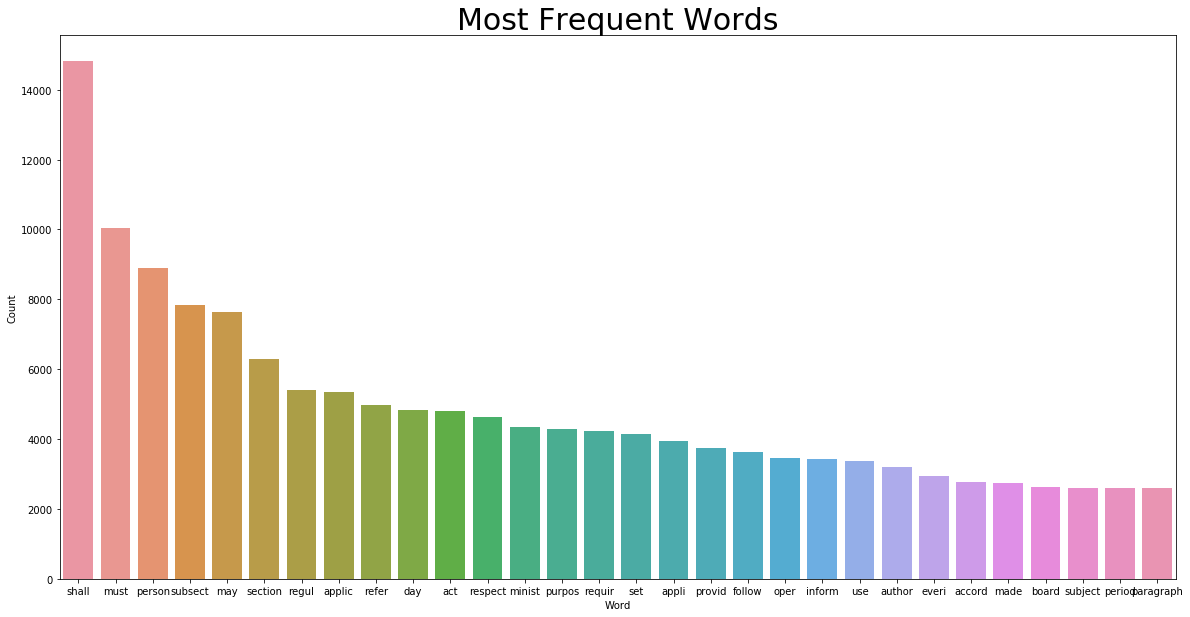

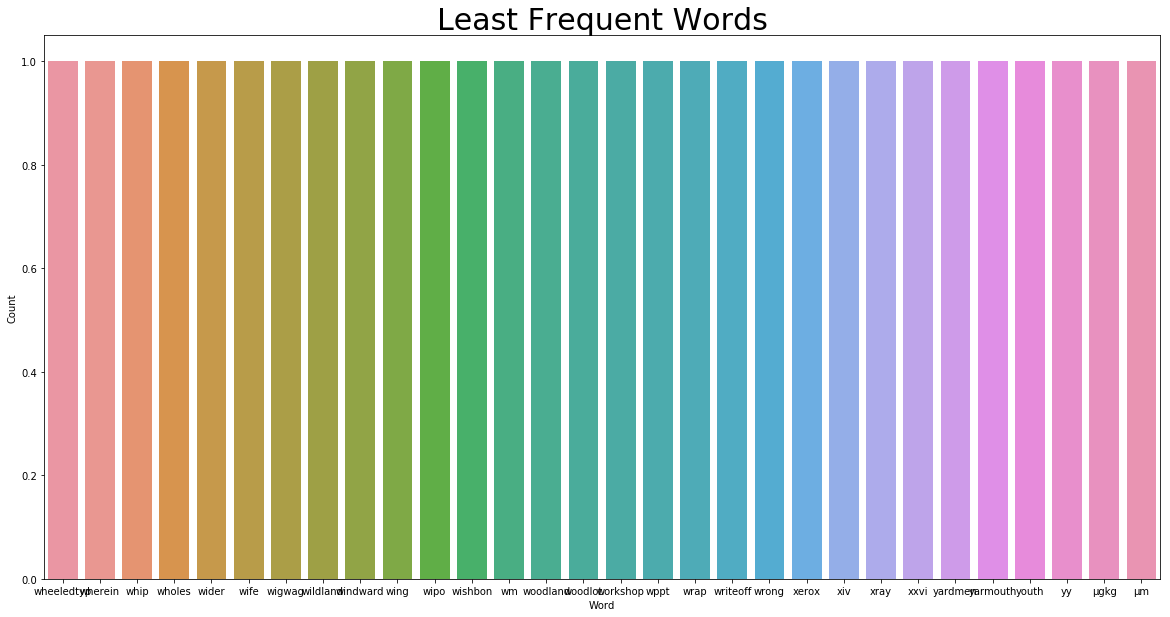

In [108]:
# Visualizing the count of most and least frequent words
df_words = pd.DataFrame(word_count, columns=['Word','Count'])

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='Word',y='Count', data=df_words.head(30))
plt.title('Most Frequent Words', size=30)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='Word',y='Count', data=df_words.tail(30))
plt.title('Least Frequent Words', size=30)

In [92]:
#How many words show up once?
print(len(df_words[df_words['Count']==1]))
df_words[df_words['Count']==1]

1671


,Word,Count
5841,ab,1
5842,abey,1
5843,ablat,1
5844,aboard,1
5845,abreast,1
5846,abstain,1
5847,abstent,1
5848,abut,1
5849,academi,1
5850,accret,1


Text(0,0.5,'How Many Words')

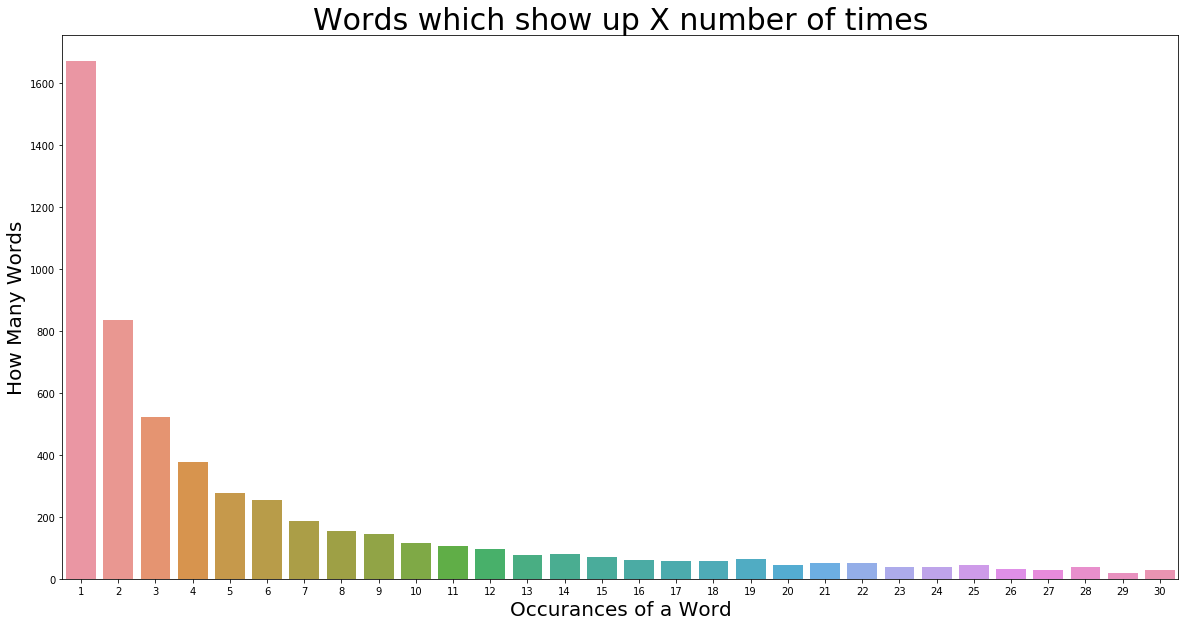

In [105]:
#Of the least freqently occuring words, how many show up X number of times?
#### Example, ~1600 different words appear only once in the entire sparse matrix

df_freq = df_words.groupby('Count').count().reset_index()

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='Count',y='Word', data=df_freq.head(30))
plt.title('Words which show up X number of times', size=30)
plt.xlabel('Occurances of a Word', size=20)
plt.ylabel('How Many Words', size=20)

##### Removing Frequently Occuring Words & Words Which Only Appear Once

In [120]:
high_freq_words = list(df_words['Word'][0:15])

In [121]:
df_sparse = df_sparse.drop(columns=high_freq_words)

In [122]:
low_freq_words = list(df_words[df_words['Count']==1]['Word'])

In [123]:
df_sparse = df_sparse.drop(columns=low_freq_words)

In [135]:
df_sparse.shape

(2274, 5826)

In [136]:
cols = df_sparse.columns

## 3. TF-IDF Vectorizer

In [137]:
#convert the count matrix to tf idf representation
from sklearn.feature_extraction.text import TfidfTransformer

In [138]:
transformer = TfidfTransformer()

In [139]:
tfidf = transformer.fit_transform(df_sparse).toarray()

In [140]:
print(tfidf.shape)

(2274, 5826)


In [141]:
df_sparse = pd.DataFrame(tfidf, columns = cols)

In [142]:
feature_names = df_sparse.columns

# find maximum value for each of the features over all of dataset:
max_val = df_sparse.max(axis=0).ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:20]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-20:]]))

Features with lowest tfidf:
Index(['vv', 'repackag', 'nonaeri', 'currentlimit', 'paus',
       'nitroglycerinebas', 'flameproduc', 'safetycrit', 'tester',
       'newtonsecond', 'interlock', 'openel', 'extran', 'firstaid', 'prediv',
       'lifesupport', 'twocompart', 'altitud', 'recompress', 'overrul'],
      dtype='object')

Features with highest tfidf: 
Index(['dive', 'playpen', 'april', 'januari', 'corpor', 'amnesti', 'pacifi',
       'march', 'registr', 'june', 'lighter', 'juli', 'redetermin', 'network',
       'octob', 'novemb', 'februari', 'diseas', 'amend', 'appli'],
      dtype='object')


## 4. Latent Semantic Analysis

##### Using 2 Concepts for Visualization

In [174]:
from sklearn.decomposition import TruncatedSVD

In [175]:
lsa_2 = TruncatedSVD(n_components = 2, algorithm='arpack', random_state=0)

In [176]:
dtm_lsa_2 = lsa_2.fit_transform(tfidf)

In [177]:
df_lsa_2 = pd.DataFrame(dtm_lsa, index=dataset['instrument_number'], columns=['component_1','component_2']).reset_index()
df_lsa_2 

,instrument_number,component_1,component_2
0,SOR/2017-109,0.090301,0.020910
1,SOR/85-567,0.025096,0.006995
2,SOR/93-293,0.300556,0.817902
3,SOR/98-87,0.064900,0.006966
4,"C.R.C., c. 208",0.058489,0.018679
5,SOR/86-1135,0.308654,0.903686
6,"C.R.C., c. 220",0.124028,-0.004634
7,SOR/2007-121,0.110639,-0.017658
8,SOR/2017-121,0.057941,0.013957
9,SOR/57-216,0.041379,0.005079


Text(0,0.5,'Component 2')

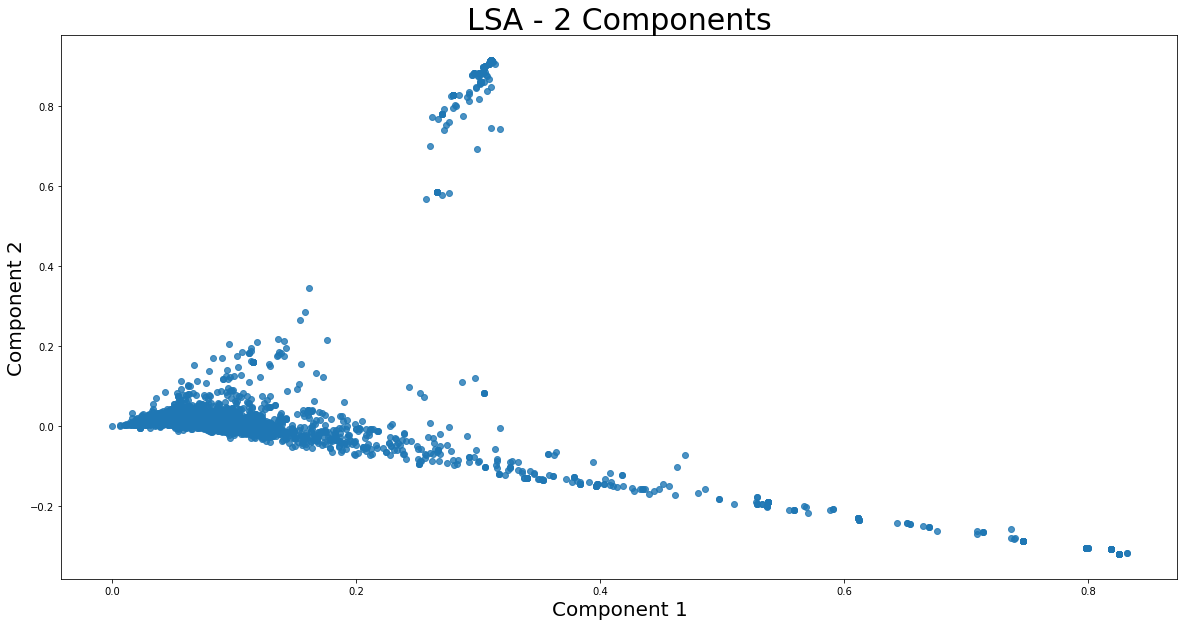

In [178]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x='component_1',y='component_2', data=df_lsa_2, fit_reg=False)
plt.title('LSA - 2 Components', size=30)
plt.xlabel('Component 1', size=20)
plt.ylabel('Component 2', size=20)

##### Using 100 Concepts for Clustering

In [179]:
lsa = TruncatedSVD(n_components = 100, algorithm='arpack', random_state=0)

In [184]:
dtm_lsa = lsa.fit_transform(tfidf)

In [196]:
#What are the top components of each concept?
for i, comp in enumerate(lsa.components_):
    terms_in_comp = zip(cols,comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:10]
    print('Concept %d:' %i)
    
    for term in sorted_terms:
        print(term[0])
    print (' ')



Concept 0:
come
forc
regist
order
land
canada
statut
object
chapter
appli
 
Concept 1:
land
object
point
elev
airport
build
structur
appli
growth
owner
 
Concept 2:
board
commod
market
power
author
exercis
provinc
export
within
trade
 
Concept 3:
commod
market
board
power
exercis
provinc
interprovinci
trade
local
order
 
Concept 4:
immun
privileg
articl
convent
organ
canada
extent
function
set
forth
 
Concept 5:
remiss
grant
immun
privileg
order
articl
convent
import
good
duti
 
Concept 6:
compani
remiss
bank
entiti
order
grant
hold
insur
regist
condit
 
Concept 7:
statut
canada
good
chapter
import
compani
enact
export
entiti
tariff
 
Concept 8:
amount
statut
employ
chapter
payabl
paid
remiss
enact
loan
insur
 
Concept 9:
column
schedul
set
item
food
territori
amount
levi
exempt
fee
 
Concept 10:
produc
levi
good
compani
commod
export
pay
board
payabl
regist
 
Concept 11:
insur
good
amount
loan
lender
regist
privat
exercis
employ
power
 
Concept 12:
employ
territori
employe
northwest
a

In [208]:
list_concepts = []
    
for i in range(0,len(lsa.components_)):
    list_concepts.append('Concept %d' %i)

In [216]:
df_lsa = pd.DataFrame(dtm_lsa, columns=list_concept)

In [217]:
df_lsa

,Concept 0,Concept 1,Concept 2,Concept 3,Concept 4,Concept 5,Concept 6,Concept 7,Concept 8,Concept 9,Concept 10,Concept 11,Concept 12,Concept 13,Concept 14,Concept 15,Concept 16,Concept 17,Concept 18,Concept 19,Concept 20,Concept 21,Concept 22,Concept 23,Concept 24,Concept 25,Concept 26,Concept 27,Concept 28,Concept 29,Concept 30,Concept 31,Concept 32,Concept 33,Concept 34,Concept 35,Concept 36,Concept 37,Concept 38,Concept 39,Concept 40,Concept 41,Concept 42,Concept 43,Concept 44,Concept 45,Concept 46,Concept 47,Concept 48,Concept 49,Concept 50,Concept 51,Concept 52,Concept 53,Concept 54,Concept 55,Concept 56,Concept 57,Concept 58,Concept 59,Concept 60,Concept 61,Concept 62,Concept 63,Concept 64,Concept 65,Concept 66,Concept 67,Concept 68,Concept 69,Concept 70,Concept 71,Concept 72,Concept 73,Concept 74,Concept 75,Concept 76,Concept 77,Concept 78,Concept 79,Concept 80,Concept 81,Concept 82,Concept 83,Concept 84,Concept 85,Concept 86,Concept 87,Concept 88,Concept 89,Concept 90,Concept 91,Concept 92,Concept 93,Concept 94,Concept 95,Concept 96,Concept 97,Concept 98,Concept 99
0,0.090301,0.020910,0.140948,-0.151218,0.000354,-0.006039,-0.116439,-0.134093,-0.112979,0.389305,-0.062697,0.059175,-0.144879,-0.026578,0.082843,0.067532,-0.063205,0.143862,0.043229,0.035707,-0.170171,-0.013043,0.024938,-0.042406,-0.080971,0.008539,-0.043089,0.024021,-0.037238,-0.218880,-0.099472,0.266380,-0.293718,0.068723,0.024317,0.123516,-0.130692,-0.077244,0.026561,0.038135,0.105511,0.051034,-0.041760,-0.093533,0.027075,0.000859,0.090989,-0.041829,-0.010026,-0.084608,0.055125,0.004985,0.057737,0.055800,0.100840,-0.020454,-0.024331,-0.034439,0.009056,0.050452,-0.063319,0.048280,0.013624,0.003433,0.025231,0.077811,-0.020632,-0.033610,0.002493,0.002567,0.000747,0.006726,-0.021364,0.001770,0.034188,-0.079827,-0.050700,0.020182,0.006880,0.013106,-0.027487,0.025421,0.003073,0.005984,-0.016176,0.004696,0.027038,0.004240,-0.002074,0.033155,-0.007997,-0.062304,0.038509,-0.031432,0.010190,0.002150,0.047696,-0.019343,-0.009722,-0.004231
1,0.025096,0.006995,0.049607,-0.053605,0.004850,0.010304,-0.037366,0.000220,0.010074,0.053722,0.009530,0.008229,-0.008628,-0.006170,0.021002,0.017331,0.014199,0.009719,-0.021532,0.019736,-0.012510,-0.026905,0.034553,-0.048200,0.017256,0.025863,0.008557,-0.023331,0.038538,-0.006469,0.013658,-0.016443,-0.009841,-0.014877,-0.016439,-0.002235,-0.006337,0.005609,-0.001694,0.020915,-0.018829,0.003400,0.032352,0.011782,0.032528,0.040072,-0.003978,0.037902,0.042930,0.059104,-0.011113,0.016887,-0.035539,0.032266,-0.020766,-0.003331,-0.038287,0.035951,-0.042527,0.018240,0.043896,-0.042463,-0.011551,0.012079,0.034389,-0.047122,0.050030,0.035706,-0.014916,0.056414,0.012215,-0.001675,0.087266,0.062143,-0.012478,0.027330,0.054269,0.000311,-0.011686,-0.018808,-0.048664,-0.056113,0.029635,-0.026995,0.039848,0.032669,-0.021618,0.025744,-0.056626,-0.028928,-0.006585,0.029409,-0.048569,-0.020685,0.011259,0.043352,-0.055899,0.008384,-0.029704,-0.008688
2,0.300556,0.817902,-0.069262,0.036623,0.000906,0.017352,0.003015,0.000040,-0.031545,0.005723,-0.002024,-0.003698,0.015095,-0.029050,-0.010174,-0.020869,-0.002131,0.033288,0.046957,0.016061,0.002550,0.003252,-0.043265,-0.020173,0.076156,-0.018602,-0.021749,-0.028712,0.000402,-0.015724,0.008194,-0.003406,-0.014545,-0.010226,-0.015374,0.007421,-0.002481,0.010215,0.001469,-0.008466,-0.005008,-0.015781,-0.029270,0.030259,0.045797,0.017094,-0.012156,-0.037724,-0.037308,-0.005253,-0.026268,0.031674,0.004384,0.009695,-0.004001,-0.015432,-0.030678,-0.003550,0.022710,-0.001747,0.009611,-0.003778,-0.009468,-0.014038,-0.029517,-0.003861,-0.006055,-0.009606,-0.001588,-0.020121,-0.040114,-0.020844,-0.001783,0.001071,-0.003132,-0.012961,0.003536,-0.002788,0.012371,0.030113,-0.003593,-0.012740,0.015622,-0.015045,0.010582,-0.017473,-0.004765,0.024686,0.012178,0.003492,0.011413,-0.034652,-0.002211,-0.001373,-0.028486,-0.005030,-0.003736,0.001019,-0.010867,-0.046982
3,0.064900,0.006966,0.121344,-0.114728,-0.127607,0.157

## 5. Clustering

##### Number of Clusters - Elbow Method

In [218]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [237]:
wcss = []
counter = 0
for i in range (1,21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_lsa)
    wcss.append(kmeans.inertia_)
    counter +=1

In [238]:
counter

20

Text(0,0.5,'WCSS')

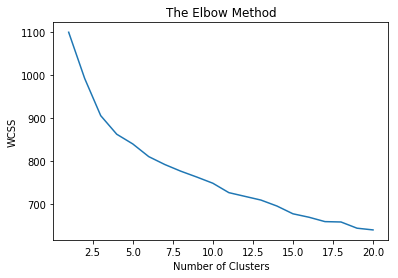

In [240]:
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

##### K-Means Clustering

In [241]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(df_lsa)
clusters = km.labels_.tolist()

In [242]:
len(df_sparse)

2274

In [243]:
len(clusters)

2274

In [244]:
len(dataset)

2274

In [245]:
#Updating the cluster labels to start at 1 instead of 0
for i in range(0,len(clusters)):
    clusters[i] += 1

In [246]:
dataset['Cluster'] = clusters

In [247]:
dataset['Cluster'].value_counts()

2     1185
5      293
6      168
4      147
1      143
10     115
9       95
7       65
8       57
3        6
Name: Cluster, dtype: int64

### Analyzing the Cluster Outputs

In [252]:
dataset[dataset['Cluster']==3]

,consolidation_date,enabling_authority,enabling_type,file_name,instrument_number,language,last_modified_date,order_number,registration_date,regulation_maker,regulation_provision,regulation_type,repealed,section_bodies,section_labels,title,Cluster
1434,2018-06-11,CUSTOMS TARIFF,act,Consolidation_Regs_1.2.0/EN/SOR-98-135.xml,SOR/98-135,en,2008-10-22,1998-280,1998-2-26,P.C.,His Excellency the Governor General in Council...,SOR,False,['Remission is granted pursuant to section 1 o...,"['2', '3']",Order Respecting the Remission of Anti-Dumping...,3
1502,2018-06-11,CRIMINAL CODE,act,Consolidation_Regs_1.2.0/EN/SOR-2002-63.xml,SOR/2002-63,en,2008-11-4,2002-114,2002-1-31,P.C.,Her Excellency the Governor General in Council...,SOR,False,['These Regulations come into force on Februar...,['2'],Regulations Excluding Certain Indictable Offen...,3
1833,2018-06-11,PARLIAMENT OF CANADA ACT,act,Consolidation_Regs_1.2.0/EN/SOR-98-126.xml,SOR/98-126,en,2008-10-22,Null,1998-2-19,Null,"[{'@format-ref': 'indent-0-0', '@language-alig...",SOR,False,['These Regulations come into force on Februar...,['2'],Senate Sessional Allowance (Suspension) Regula...,3
1859,2018-06-11,"CANADA SHIPPING ACT, 2001",act,Consolidation_Regs_1.2.0/EN/SOR-2000-71.xml,SOR/2000-71,en,2007-11-14,2000-217,2000-2-24,P.C.,Her Excellency the Governor General in Council...,SOR,False,['The following provisions of the do not appl...,"['2', '3']",Regulations Excluding Certain Government Ships...,3
2477,2018-06-11,PUBLIC SERVICE EMPLOYMENT ACT,act,Consolidation_Regs_1.2.0/EN/SOR-2006-36.xml,SOR/2006-36,en,2006-3-24,2006-68,2006-2-6,P.C.,Her Excellency the Governor General in Council...,SOR,False,['These Regulations come into force on Februar...,['2'],Transfer of the Crown Corporation Secretariat ...,3
3589,2018-06-11,STATE IMMUNITY ACT,act,Consolidation_Regs_1.2.0/EN/SOR-97-121.xml,SOR/97-121,en,2008-10-28,1997-242,1997-2-18,P.C.,"[{'@format-ref': 'indent-0-0', '@language-alig...",SOR,False,"['This Order comes into force on February 18, ...",['2'],Order Restricting Certain Immunity In Relation...,3
